In [1]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

def loadData(filename, inputsNames,outputsNames):
    data = []
    dataNames = []
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1

    selectedVariables = [dataNames.index(variable) for variable in inputsNames]
    inputs = []
    for variable in selectedVariables:
        newData=[]
        for index in range(len(data)):
            if data[index][variable]!='':
                newData.append(data[index][variable])
            else:
                newData.append(0)
            
        inputs.append(newData)
    
    
    outputSelected = dataNames.index(outputsNames)
    outputs = [data[index][outputSelected] for index in range(len(data))]
    
    return inputs, outputs




In [2]:
def generateData(inputs, outputs):
    np.random.seed(5)
    indexes = [i for i in range(len(outputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(outputs)), replace=False)
    validationSample = [i for i in indexes if i not in trainSample]

    trainInputs = [[float(inputs[0][index]) for index in trainSample], [float(inputs[1][index]) for index in trainSample]]
    trainOutputs = [float(outputs[index]) for index in trainSample]

    validationInputs = [[float(inputs[0][index]) for index in validationSample], [float(inputs[1][index]) for index in validationSample]]
    validationOutputs = [float(outputs[index]) for index in validationSample]

    return trainInputs, trainOutputs, validationInputs, validationOutputs




In [3]:

def skRegression(trainInputs, trainOutputs, validationInputs, validationOutputs):
    data = [(float(x1), float(x2)) for x1, x2 in zip(trainInputs[0], trainInputs[1])]
    regressor = linear_model.LinearRegression()
    regressor.fit(data, trainOutputs)

    w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
    print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x1 + ', w2, ' * x2')

    valids = [[float(x1), float(x2)] for x1, x2 in zip(validationInputs[0], validationInputs[1])]

    computedOutputs = regressor.predict(valids)

    error = mean_squared_error(validationOutputs, computedOutputs)
    print("Prediction error: ", error)





155
155


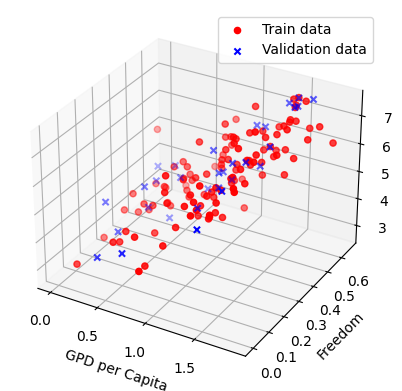

the learnt model: f(x) =  2.5283663170771993  +  1.8763387359806358  * x1 +  2.3147487474925605  * x2
Prediction error:  0.2778267435211815


In [7]:
def plotData(inputs, outputs):
    plt.style.use('default')
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    trainInputs, trainOutputs, validationInputs, validationOutputs = generateData(inputs, outputs)
    ax.scatter(trainInputs[0], trainInputs[1], trainOutputs, c='r', marker='o', label='Train data')
    ax.scatter(validationInputs[0], validationInputs[1], validationOutputs, c='b', marker='x', label='Validation data')
    ax.set_xlabel("GPD per Capita")
    ax.set_ylabel("Freedom")
    ax.set_zlabel("Happiness")
    plt.legend(loc='upper right')
    plt.show()



v1_data = 'data/v1_world-happiness-report-2017.csv'
v2_data = 'data/v2_world-happiness-report-2017.csv'
v3_data = 'data/v3_world-happiness-report-2017.csv'
inputs, outputs = loadData(v1_data,['Economy..GDP.per.Capita.', 'Freedom'],'Happiness.Score')

print(len(inputs[1]))
print(len(outputs))

plotData(inputs, output)

trainInputs, trainOutputs, validateInputs, validateOutputs = generateData(inputs, output)

skRegression(trainInputs, trainOutputs, validateInputs, validateOutputs)
